<a href="https://colab.research.google.com/github/santr4/Kaggle/blob/main/Imdb_reviews/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis - To predict the sentiments through reviews given by the imdb users.

In [5]:
# ** importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid',{"grid.color":"0.2","grid.linestyle":":"})

In [2]:
df_review = pd.read_csv("/content/IMDB Dataset.csv")


In [3]:
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
# ** our dataset contains 50000 datasets which is very large and takes a lot of time to train. So, we will use 10000 of input dataset and out of that 9000 positive and 1000 negative.
# ** I will use imblearn library to make the imbalanced library to a balanced library.

In [6]:
df_positive = df_review[df_review['sentiment'] == 'positive'][:9000]
df_negative = df_review[df_review['sentiment'] == 'negative'][:1000]

In [10]:
print(df_positive.shape)  # 9000 positive sentiments.

(9000, 2)


In [9]:
print(df_negative.shape)  # 1000 negative sentiments.

(1000, 2)


In [12]:
df_review_imb = pd.concat([df_positive,df_negative])  # ** pd.concat() is to add two different dataframes.

In [13]:
df_review_imb.shape

(10000, 2)

In [14]:
# ** In our dataset one class has a lot of observations and the other class has fewer observations. We have to remove this imbalance to make our model make good predictions.

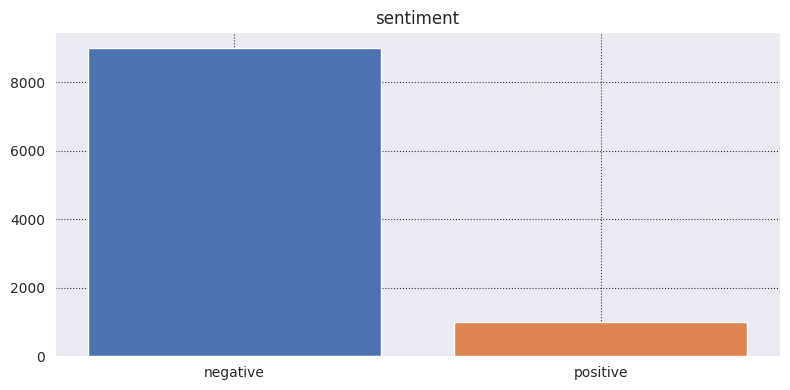

In [17]:
colors = sns.color_palette('deep')   # deep is combinations of 10 colors which make a color palette of name deep.

plt.figure(figsize=(8,4),tight_layout=True) # tight_layout makes the subplot autimatically adjust to the figsize and also removes the overlapping of the labels.

#  plt.bar(x-axis,y-axis)
plt.bar(x=['negative','positive'],height=df_review_imb.value_counts(['sentiment']),color=colors[:2])

plt.title('sentiment')
plt.savefig('sentiment.png')

plt.show()

In [18]:
# we will use the imblearn library. Either we need to make the negative samples less or the positive samples more. (Resampling of the input data)

In [19]:
from imblearn.under_sampling import  RandomUnderSampler

rus = RandomUnderSampler(random_state=0)  # the random_state = 0 means that every time the code is runned the under sampling will be done for the same type of numbers.

df_review_bal,df_review_bal['sentiment'] = rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])


In [20]:
df_review_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


In [21]:
df_review_bal.shape

(2000, 2)

In [22]:
# ** we can compare the imbalanced dataset and the balanced dataset.

In [25]:
print(df_review_imb.value_counts(['sentiment']))
print(df_review_bal.value_counts(['sentiment']))

sentiment
positive     9000
negative     1000
dtype: int64
sentiment
negative     1000
positive     1000
dtype: int64


In [27]:
# now we will split the dataset into test and train dataset.

In [26]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df_review_bal,test_size=0.33,random_state=42) # random_state = 42 , this produces the same result across different run.

In [29]:
train_x,train_y=train['review'],train['sentiment']
test_x,test_y=test['review'],test['sentiment']

In [31]:
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(1340,) (1340,)
(660,) (660,)


In [32]:
train.shape

(1340, 2)

In [33]:
test.shape

(660, 2)

In [34]:
train_y.value_counts()

negative    675
positive    665
Name: sentiment, dtype: int64

In [37]:
# we will convert the text_reviews into numerical values so that we can give it to the model for training.
# the .fit() --> it takes out the mean and the standard deviation
# the .transform() --> this is used for scaling the input data using the mean and standard deviation.
# the .fit_transform() --> this does both the functions of fit and transform.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer  # tf = term frequency and idf = iverse document frequency.

tfidf = TfidfVectorizer(stop_words='english')

train_x_vector = tfidf.fit_transform(train_x)

test_x_vector = tfidf.transform(test_x)  # IMP =>  a small doubt here

In [43]:
feature_names = tfidf.get_feature_names_out()
print(feature_names)

['00' '000' '007' ... 'ísnt' 'ïn' 'ünfaithful']


In [41]:
train_x_vector.shape

(1340, 20625)

In [38]:
# ** now we have to transform the test_x_vector so that I can use it for finding the accuracy.

In [40]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,index=train_x.index,columns=tfidf.get_feature_names_out())  # we are using the sparse matrix because it uses less storage and it takes less time for computing.

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# ** now we will use different models to train the model so that we can later on find the accuracy using the test for the model.

In [45]:
# ** model selection

In [47]:
# SVM(support vector machine)

from sklearn.svm import SVC
svc = SVC(kernel='linear')  # the linear support vector classifier uses the linear kernel to find the prediction.
svc.fit(train_x_vector,train_y)

SVC(kernel='linear')

In [48]:
print(svc.predict(tfidf.transform(['A good movie'])))

['positive']


In [50]:
x = svc.predict(tfidf.transform(['This is an excellent movie.']))

In [51]:
print(x)

['positive']


In [52]:
y = svc.predict(tfidf.transform(['A very bad movie and please I request people not to watch it.']))

In [53]:
print(y)

['negative']


In [56]:
z = svc.predict(tfidf.transform(['Please I request everyone not to watch it.']))  # this is an example where it should show negative sentiment but it's showing positive sentiment.

In [55]:
print(z)

['positive']


In [57]:
l = svc.predict(tfidf.transform(['It is a bad movie']))

In [58]:
print(l)

['negative']


In [59]:
# ** Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

LogisticRegression()

In [61]:
print(log_reg.predict(tfidf.transform(['An excellent movie'])))

['positive']


In [62]:
h = log_reg.predict(tfidf.transform(['Dont watch that movie its very bad']))
print(h)

['negative']


In [73]:
print(log_reg.predict(tfidf.transform(['Please I request everyone not to watch it.'])))

['positive']


In [63]:
# naive bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(),train_y)

GaussianNB()

In [67]:
# in the gaussianNB(), we need to give the dense array(which contains the integers in double) and not the sparse vector(both indices and values)
# That's why we converted the train_x_vector into dense array which was earlier in sparse vector.

In [71]:
t = gnb.predict(tfidf.transform(['It is a brilliant movie']).toarray())  # here in this naive bayes it is showing wrong sentiment.

In [72]:
print(t)

['negative']


I think the above models are showing some wrong sentiments because we took very less amount of input dataset just for our understanding.

In [74]:
# model evaluation - now we will check the accuracy of the models for understanding which is good for predicting the sentiments of the viewers.

In [75]:
# ** mean accuracy

In [76]:
print(svc.score(test_x_vector,test_y))

0.8409090909090909


In [77]:
print(gnb.score(test_x_vector.toarray(),test_y))

0.6348484848484849


In [78]:
print(log_reg.score(test_x_vector,test_y))

0.8303030303030303


Confusion matrix

In [79]:
# ** A confusion matrix is used to visualize the performance of the matrix. Here the rows and columns are - false positive, false negative, true positive and true negative.

In [80]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y,svc.predict(test_x_vector),labels=['positive','negative'])

conf_mat

array([[290,  45],
       [ 60, 265]])